# Programowanie sieciowe

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import netgraph

# Zadanie 1
## Sciezka krytyczna

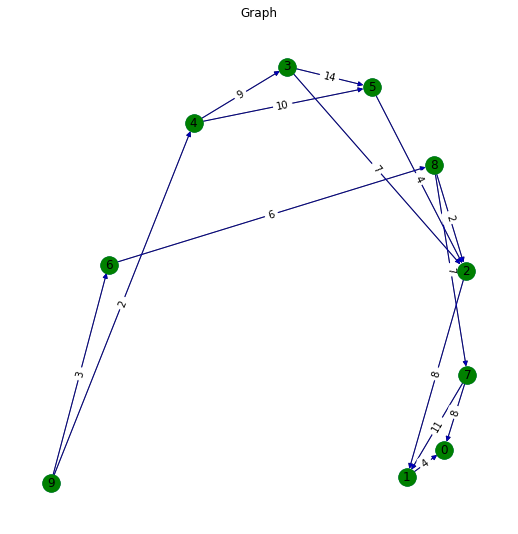

In [5]:

weights = [
    (1, 0, 4),
    (7, 0, 8),
    (7, 1, 11),
    (2, 1, 8),
    (8, 2, 2),
    (5, 2, 4),
    (3, 2, 7),
    (4, 3, 9),
    (3, 5, 14),
    (4, 5, 10),
    (6, 8, 6),
    (8, 7, 7),
    (9, 6, 3),
    (9, 4, 2)
]

G = nx.DiGraph()

G.add_weighted_edges_from(weights)

fig = plt.figure(figsize=(7, 7))

pos = nx.spiral_layout(G)

nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(G, pos, width=1,alpha=0.5,edge_color='b')
nx.draw_networkx_nodes(G, pos,node_size=300, node_color="g")
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.title("Graph")
plt.show()
# print(nx.get_edge_attributes(G,'weight'))

**9** - wierzcholek do ktorego nie wchodzi zaden inny <br>
**0** - wierzcholek z ktorego nie wychodzi zaden inny

In [6]:
M = nx.to_numpy_array(G, nodelist=range(10))

def changeIndexing(M):
    M_copy = M.copy()
    M_copy[M_copy > 0] = 1 # Tworze macierz binarna
    columns = [i for i in range(len(M))] # Miejsce zapisu
    path = []

    while len(M) > 1:
        n = len(M)

        for i in range(n):
            if False not in list(M[:,i] == 0):
                mask = [k for k in range(n) if k != i]
                M = M[np.ix_(mask, mask)]
                path.append(columns.pop(i))
                break
    
    path.append(0)
    changedIndexes = [0 for _ in range(len(path))]

    for i, el in enumerate(path):
        changedIndexes[el] = i
    return changedIndexes

In [7]:
class Queue:
    def __init__(self):
        self.queue = []

    def enqueue(self, val):
        self.queue.append(val)
    
    def dequeue(self):
        return self.queue.pop(0)
    
    def is_empty(self):
        return len(self.queue) == 0

In [19]:
def findCritical(M):
    n = len(M)
    newIndexes = changeIndexing(M)

    start = newIndexes[0]
    
    terminy = [[0, np.inf] for _ in range(n)]
    
    # Wykonac przeszukanie wszerz aby obliczyc najwczesniejsze terminy
    # Zapisac ostatni wierzcholek a nastepnie zrobic odwrotne przeszukanie wszerz aby obliczyc najpozniejsze
    queue = Queue()
    queue.enqueue(start)
    while not queue.is_empty():
        current = queue.dequeue()

        for i in range(n):
            if M[current][i] != 0:
                currentChangedIndex = newIndexes[current]
                changedIndex = newIndexes[i]

                if terminy[currentChangedIndex][0] + M[current][i] > terminy[changedIndex][0]:
                    terminy[changedIndex][0] = terminy[currentChangedIndex][0] + M[current][i]
                queue.enqueue(i)

    end = 0
    terminy[newIndexes[end]][1] = terminy[newIndexes[end]][0]
    queue.enqueue(end)
    while not queue.is_empty():
        current = queue.dequeue()

        for i in range(n):
            if M[i][current] != 0:
                currentChangedIndex = newIndexes[current]
                changedIndex = newIndexes[i]

                if terminy[currentChangedIndex][1] - M[i][current] < terminy[changedIndex][1]:
                    terminy[changedIndex][1] = terminy[currentChangedIndex][1] - M[i][current]
                queue.enqueue(i)
    
    print(terminy)
    print(newIndexes)


In [20]:
M = nx.to_numpy_array(G, nodelist=[i for i in range(10)])

findCritical(M)

[[0, 0.0], [2.0, 2.0], [11.0, 11.0], [25.0, 25.0], [3.0, 13.0], [9.0, 19.0], [29.0, 29.0], [16.0, 26.0], [37.0, 37.0], [41.0, 41.0]]
[9, 8, 6, 2, 1, 3, 4, 7, 5, 0]
